# Example

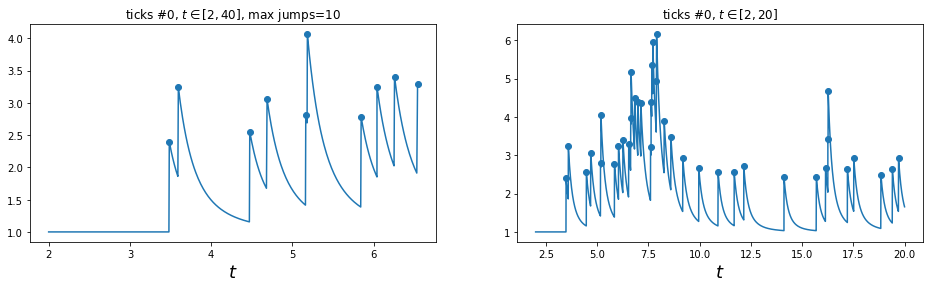

In [2]:
from tick.plot import plot_point_process
from tick.hawkes import SimuHawkes, HawkesKernelSumExp
import matplotlib.pyplot as plt

run_time = 40

hawkes = SimuHawkes(n_nodes=1, end_time=run_time, verbose=False)
kernel = HawkesKernelSumExp([.1, .2, .1], [1., 3., 7.])
hawkes.set_kernel(0, 0, kernel)
hawkes.set_baseline(0, 1.)

dt = 0.01
hawkes.track_intensity(dt)
hawkes.simulate()
timestamps = hawkes.timestamps
intensity = hawkes.tracked_intensity
intensity_times = hawkes.intensity_tracked_times

_, ax = plt.subplots(1, 2, figsize=(16, 4))
plot_point_process(hawkes, n_points=50000, t_min=2, max_jumps=10, ax=ax[0])
plot_point_process(hawkes, n_points=50000, t_min=2, t_max=20, ax=ax[1])
plt.show()

In [ ]:
from tick.plot import plot_point_process
from tick.hawkes import SimuHawkes, HawkesKernelSumExp
import matplotlib.pyplot as plt

run_time = 40

hawkes = SimuHawkes(n_nodes=1, end_time=run_time, verbose=False)
kernel = HawkesKernelSumExp([.1, .2, .1], [1., 3., 7.])
hawkes.set_kernel(0, 0, kernel)
hawkes.set_baseline(0, 1.)

dt = 0.01
hawkes.track_intensity(dt)
hawkes.simulate()
timestamps = hawkes.timestamps
intensity = hawkes.tracked_intensity
intensity_times = hawkes.intensity_tracked_times

_, ax = plt.subplots(1, 2, figsize=(16, 4))
plot_point_process(hawkes, n_points=50000, t_min=2, max_jumps=10, ax=ax[0])
plot_point_process(hawkes, n_points=50000, t_min=2, t_max=20, ax=ax[1])
plt.show()

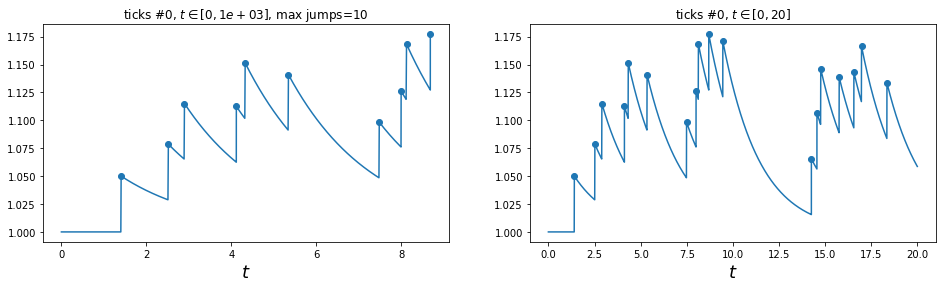

In [6]:
run_time = 1000

hawkes = SimuHawkes(n_nodes=1, end_time=run_time, verbose=False)
kernel = HawkesKernelExp(.1, .5)
hawkes.set_kernel(0, 0, kernel)
hawkes.set_baseline(0, 1.)

dt = 0.01
hawkes.track_intensity(dt)
hawkes.simulate()
timestamps = hawkes.timestamps
intensity = hawkes.tracked_intensity
intensity_times = hawkes.intensity_tracked_times

_, ax = plt.subplots(1, 2, figsize=(16, 4))
plot_point_process(hawkes, n_points=50000, t_min=0, max_jumps=10, ax=ax[0])
plot_point_process(hawkes, n_points=50000, t_min=0, t_max=20, ax=ax[1])
plt.show()

# Kernel Shapes

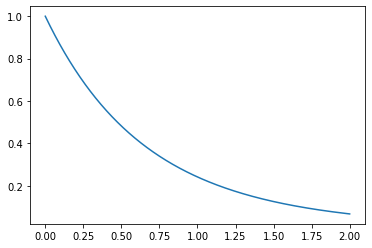

In [20]:
import numpy as np
kernel_sumExp = HawkesKernelSumExp([(1/3)*1/2, (1/3)*1/1.5, (1/3)*1], [2., 1.5 ,1.])
t_values = np.linspace(0,2,1000)
plt.plot(t_values, kernel_sumExp.get_values(t_values))

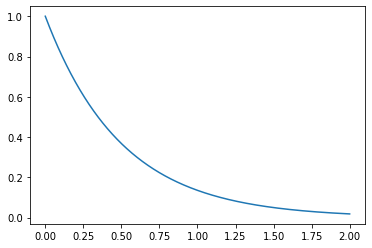

In [12]:
from tick.hawkes import  HawkesKernelExp
kernel_exp = HawkesKernelExp(1/2, 2.)
t_values = np.linspace(0,2,1000)
plt.plot(t_values, kernel_exp.get_values(t_values))

In [1]:
from tick.hawkes import HawkesKernelPowerLaw
kernel_powerLaw = HawkesKernelPowerLaw(1., -1., 2.)
t_values = np.linspace(0,2,1000)
plt.plot(t_values, kernel_powerLaw.get_values(t_values))

ModuleNotFoundError: No module named 'tick'

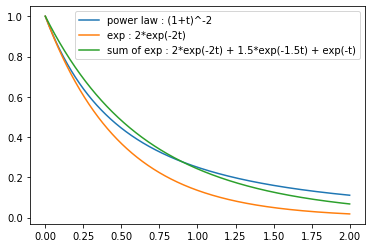

In [21]:
plt.plot(t_values, kernel_powerLaw.get_values(t_values), label = "power law : (1+t)^-2")
plt.plot(t_values, kernel_exp.get_values(t_values), label = "exp : 2*exp(-2t)")
plt.plot(t_values, kernel_sumExp.get_values(t_values),  label = "sum of exp : 2*exp(-2t) + 1.5*exp(-1.5t) + exp(-t)")
plt.legend()

# ACF vs Kernels

## Exp

### varying Decay params from 0.01 to 1.0 on log scale 

In [7]:
import pandas as pd
import datetime as dt

In [8]:
df = pd.DataFrame({'time': timestamps[0], 'count' : [1]*len(timestamps[0])})


In [9]:
df.head()

,time,count
0,1.406977,1
1,2.519577,1
2,2.898903,1
3,4.120961,1
4,4.329009,1


In [10]:
rolledWindow = df.set_index(df.time.apply(lambda x: dt.timedelta(seconds=x)))['count'].rolling(window = '1s').sum()

In [11]:
rolledWindow.values

array([1., 1., 2., ..., 1., 2., 3.])

In [12]:
from statsmodels.graphics.tsaplots import plot_acf

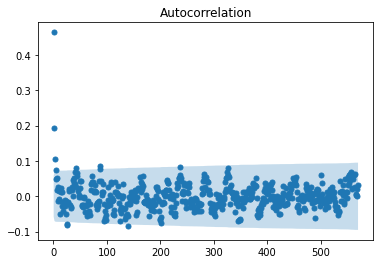

In [13]:
plot_acf(rolledWindow.values, lags = len(rolledWindow.values)//2, zero=False, use_vlines=False)
plt.show()

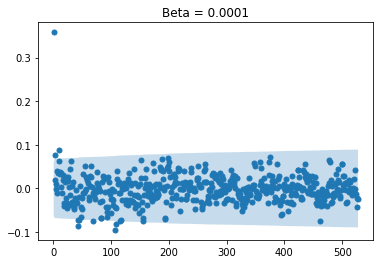

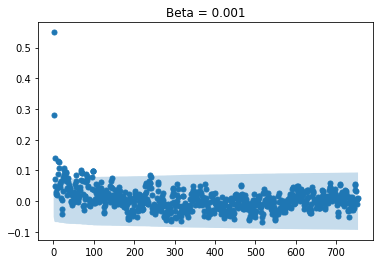

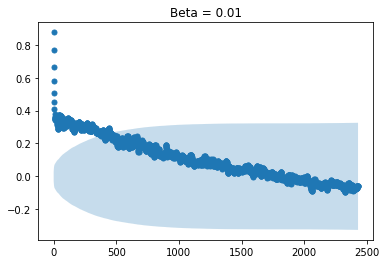

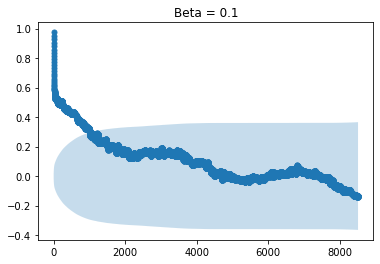

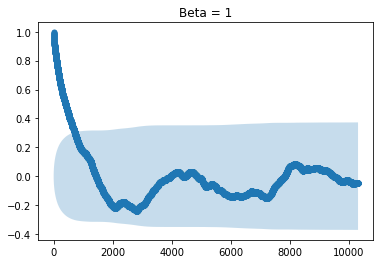

In [14]:
for i in range(5):
    p = -4 + i
    
    run_time = 1000
    hawkes = SimuHawkes(n_nodes=1, end_time=run_time, verbose=False)
    kernel = HawkesKernelExp(.95, 10**p)
    hawkes.set_kernel(0, 0, kernel)
    hawkes.set_baseline(0, 1.)

    del_t = 0.01
    hawkes.track_intensity(del_t)
    hawkes.simulate()
    timestamps = hawkes.timestamps
    df = pd.DataFrame({'time': timestamps[0], 'count' : [1]*len(timestamps[0])})
    rolledWindow = df.set_index(df.time.apply(lambda x: dt.timedelta(seconds=x)))['count'].rolling(window = '1s').sum()
    plot_acf(rolledWindow.values, lags = len(rolledWindow.values)//2, zero=False, use_vlines=False)
    plt.title("Beta = " + str(10**p))
    plt.show()

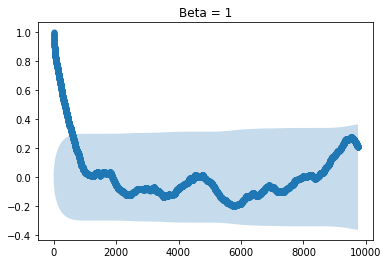

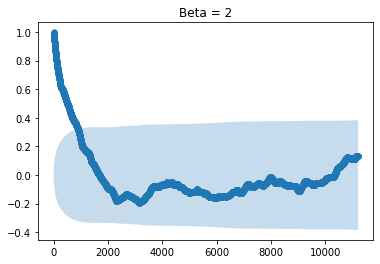

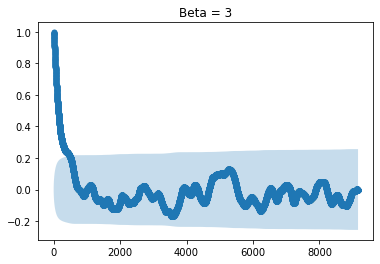

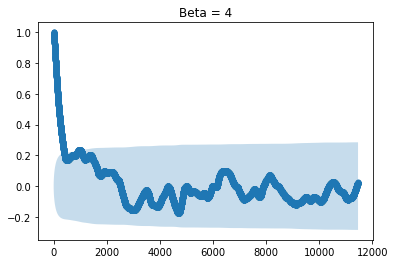

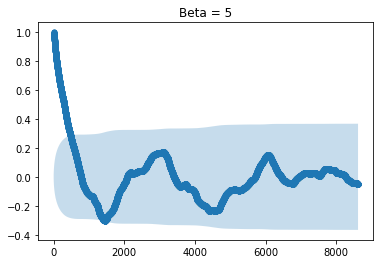

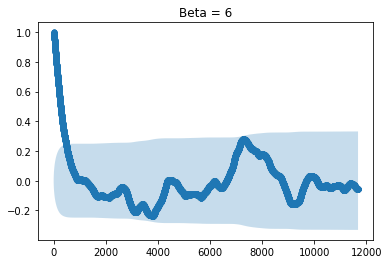

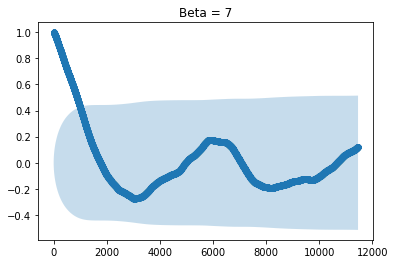

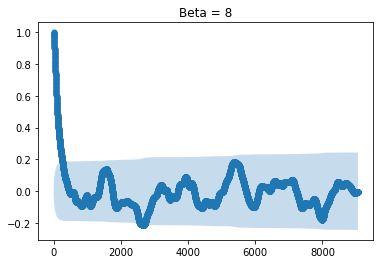

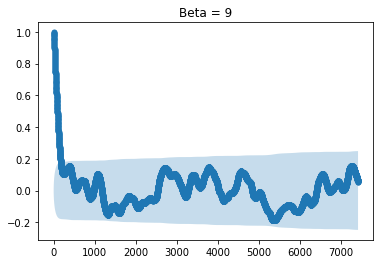

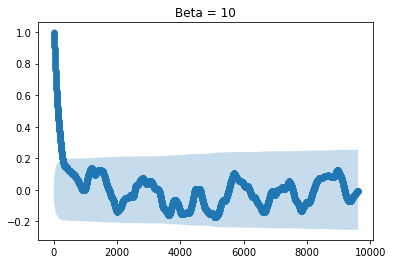

In [36]:
for i in range(1,11):
    p = i
    
    run_time = 1000
    hawkes = SimuHawkes(n_nodes=1, end_time=run_time, verbose=False)
    kernel = HawkesKernelExp(.95, p)
    hawkes.set_kernel(0, 0, kernel)
    hawkes.set_baseline(0, 1.)

    del_t = 0.01
    hawkes.track_intensity(del_t)
    hawkes.simulate()
    timestamps = hawkes.timestamps
    df = pd.DataFrame({'time': timestamps[0], 'count' : [1]*len(timestamps[0])})
    rolledWindow = df.set_index(df.time.apply(lambda x: dt.timedelta(seconds=x)))['count'].rolling(window = '1s').sum()
    plot_acf(rolledWindow.values, lags = len(rolledWindow.values)//2, zero=False, use_vlines=False)
    plt.title("Beta = " + str(p))
    plt.show()

## Power Law

0.999


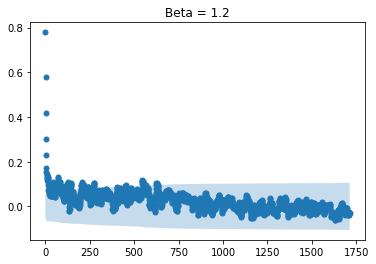

0.999


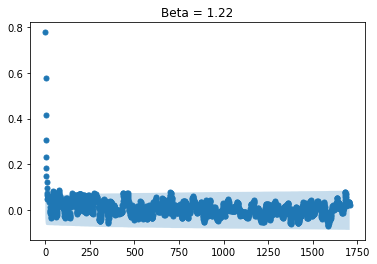

0.999


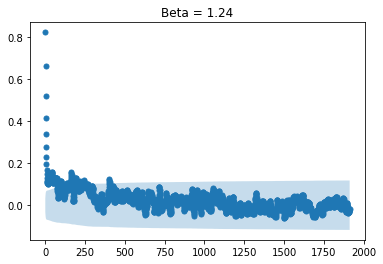

0.999


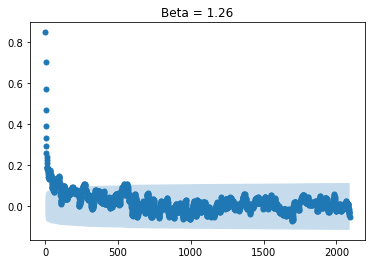

0.999


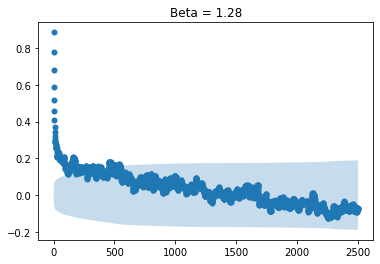

0.999


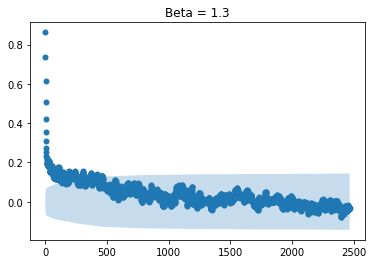

0.999


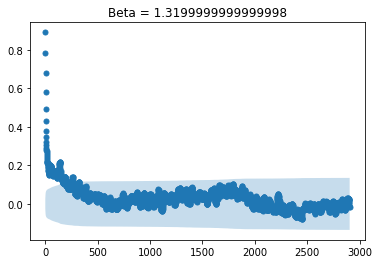

0.999


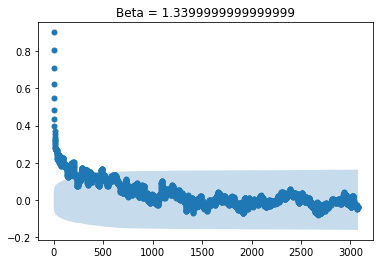

0.999


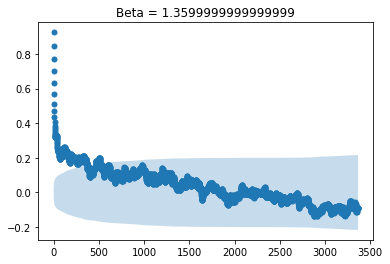

0.999


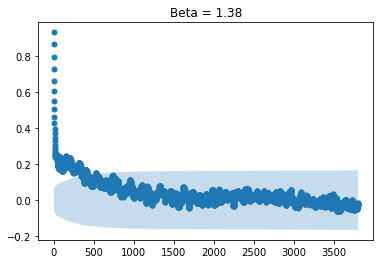

0.999


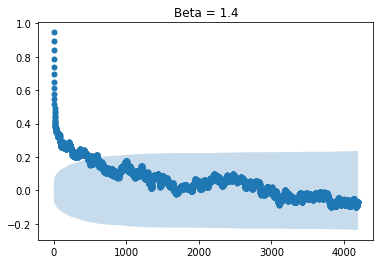

0.999


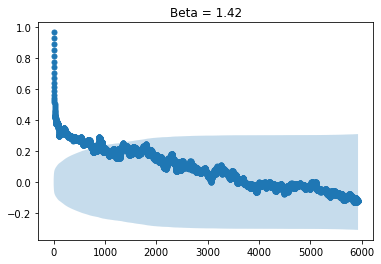

0.999


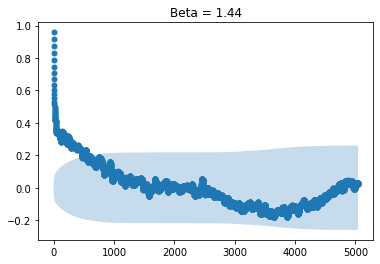

0.999


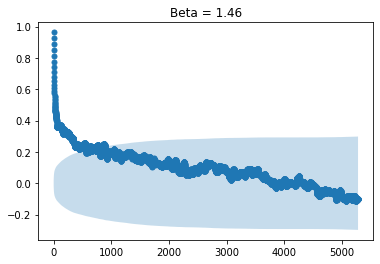

0.999


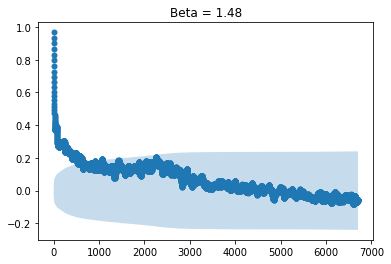

0.999


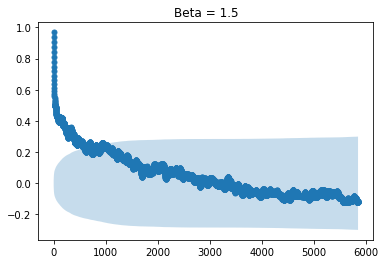

0.999


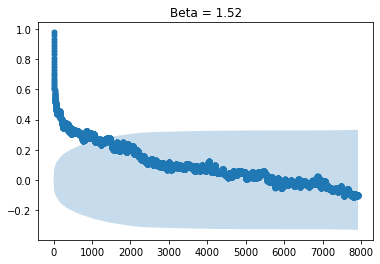

0.999


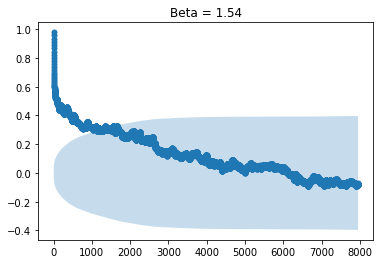

0.999


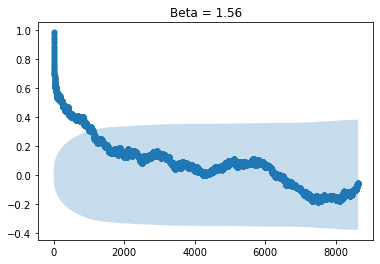

0.999


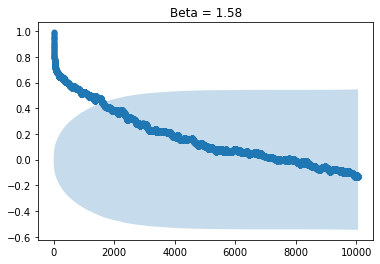

0.999


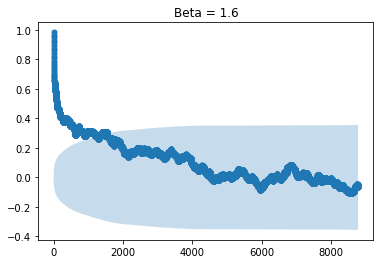

0.999


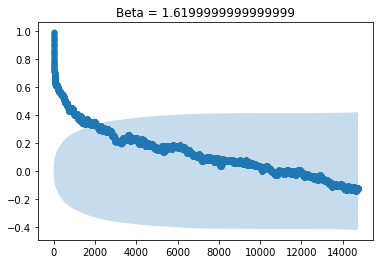

0.999


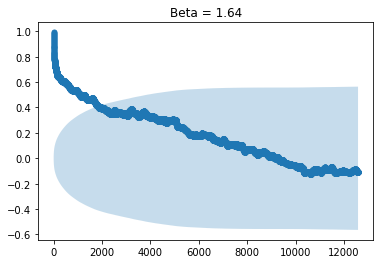

0.999


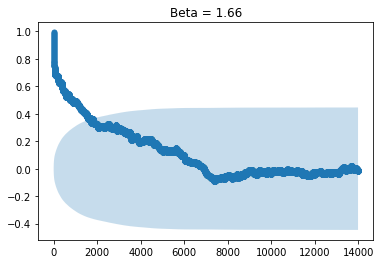

0.999


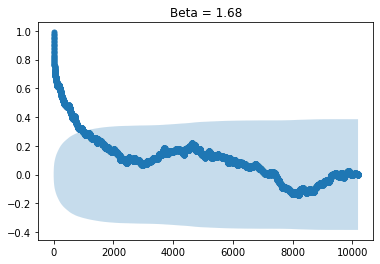

0.999


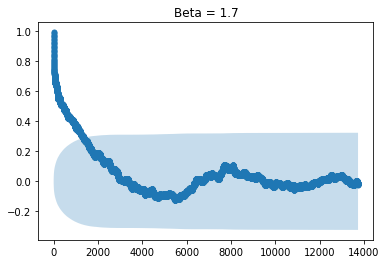

0.999


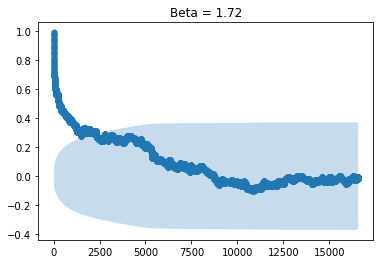

0.999


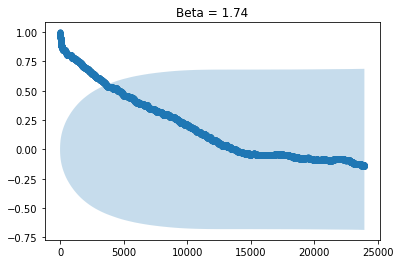

0.999


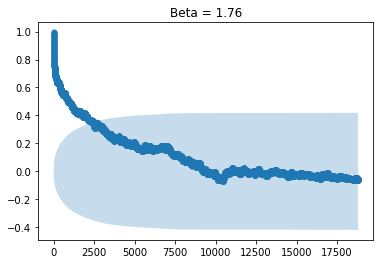

0.999


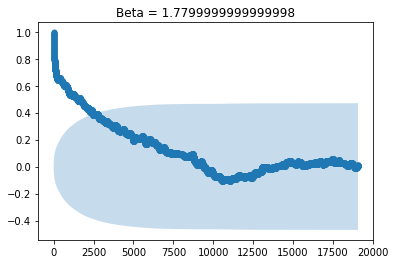

0.999


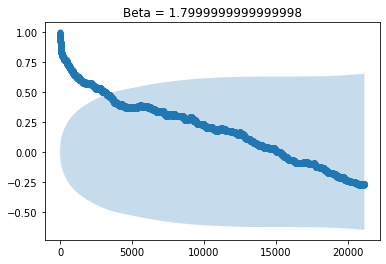

0.999


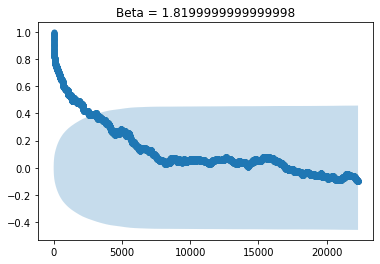

0.999


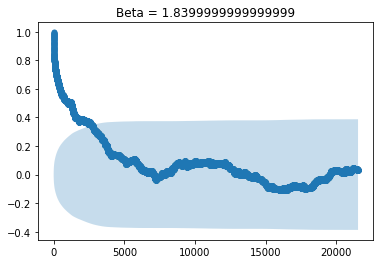

0.999


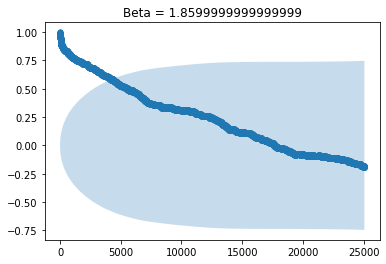

0.999


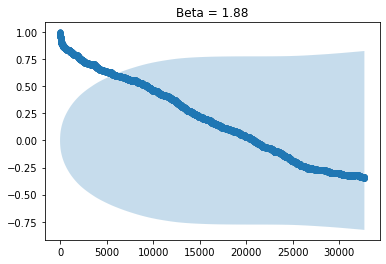

0.999


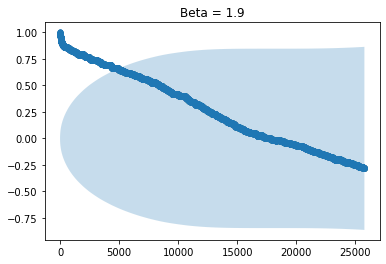

0.999


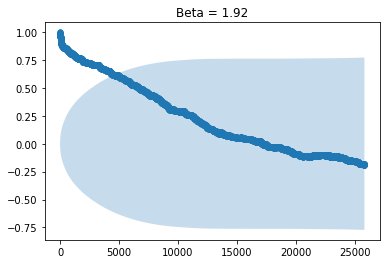

0.999


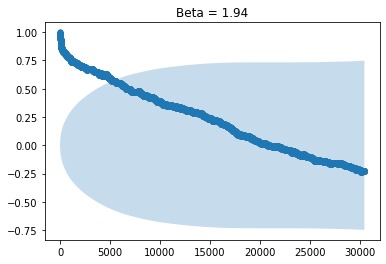

0.999


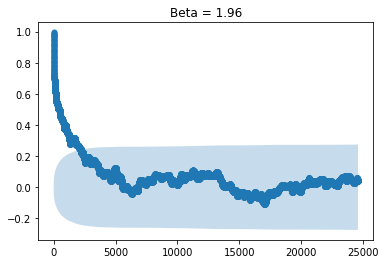

0.999


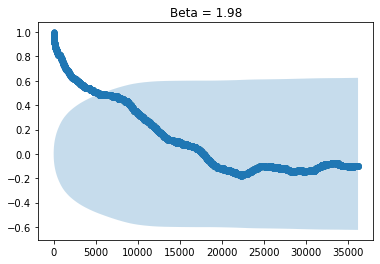

0.999


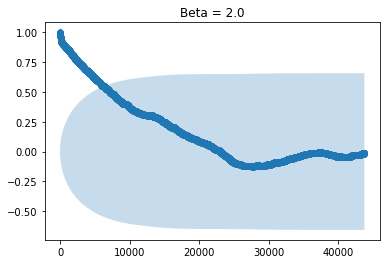

0.999


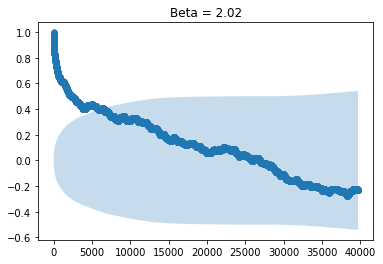

0.999


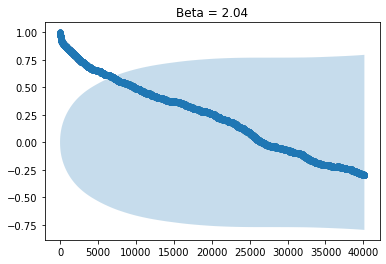

0.999


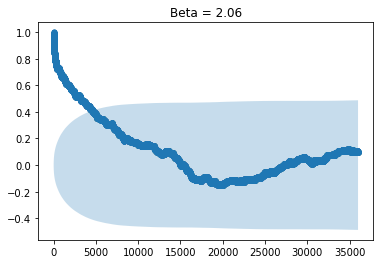

0.999


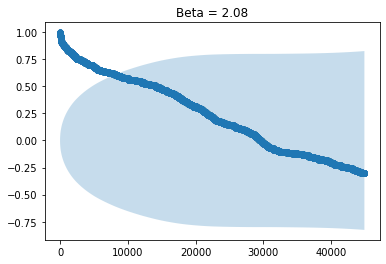

0.999


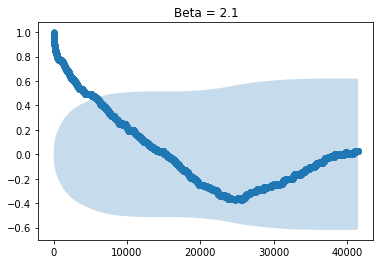

0.999


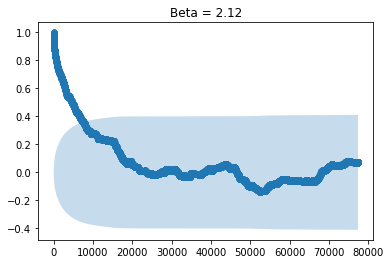

0.999


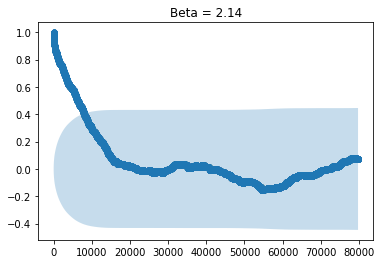

0.999


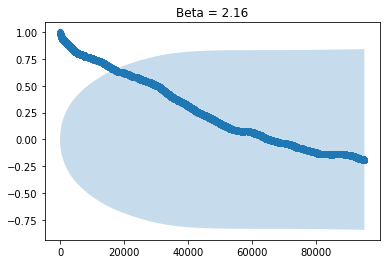

0.999


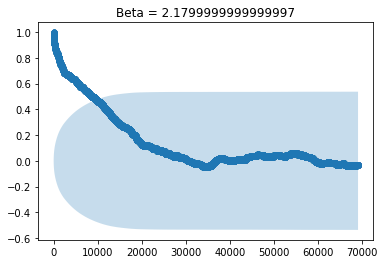

In [35]:
for i in range(50):
    
    
    run_time = 1000
    hawkes = SimuHawkes(n_nodes=1, end_time=run_time, verbose=False)
    a = 1
    b = 1
    c = 1.2 + 0.02*i
    while a*b**(1-c) >= 1:
        a = a * 0.999
    print(a)
    kernel = HawkesKernelPowerLaw(a*(c-1), b, c)
    hawkes.set_kernel(0, 0, kernel)
    hawkes.set_baseline(0, 1.)

    #del_t = 0.01
    #hawkes.track_intensity(del_t)
    hawkes.simulate()
    timestamps = hawkes.timestamps
    df = pd.DataFrame({'time': timestamps[0], 'count' : [1]*len(timestamps[0])})
    rolledWindow = df.set_index(df.time.apply(lambda x: dt.timedelta(seconds=x)))['count'].rolling(window = '1s').sum()
    plot_acf(rolledWindow.values, lags = len(rolledWindow.values)//2, zero=False, use_vlines=False)
    plt.title("Beta = " + str(c))
    plt.show()

In [ ]:
timestamps